# "Market Based Analysis"
# By:
#   Ankit Dwivedi


# Market Based Analysis 
Market Based Analysis is one of the key techniques used by large relations to show associations between items.
It allows retailers to identify relationships between the items that people buy together frequently.

Given a set of transactions, we have to  predict the occurrence of an item based on the occurrences of other items in the transaction.


In [2]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for defining path
#import os
#print(os.listdir('../input/'))

# for market basket analysis
from apyori import apriori

In [3]:
# reading the dataset



data = pd.read_csv("D:\Ankit Dwivedi\Downloads\Market_Basket_Optimisation.csv", header = None)


# let's check the shape of the dataset
data.shape

(7501, 20)

In [4]:
# checking the head of the data

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# checkng the tail of the data

data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# checking the random entries in the data

data.sample(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
5762,frozen vegetables,whole wheat rice,cooking oil,cereals,protein bar,magazines,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2461,escalope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2554,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2539,turkey,soup,gums,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,tomato sauce,milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5336,strawberries,yogurt cake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4162,salmon,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5620,frozen vegetables,milk,eggs,brownies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6753,frozen vegetables,ground beef,chocolate,rice,french fries,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1093,frozen vegetables,mineral water,french wine,eggs,cereals,chocolate,salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# let's describe the dataset

data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,cake,frozen smoothie,protein bar,cereals,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


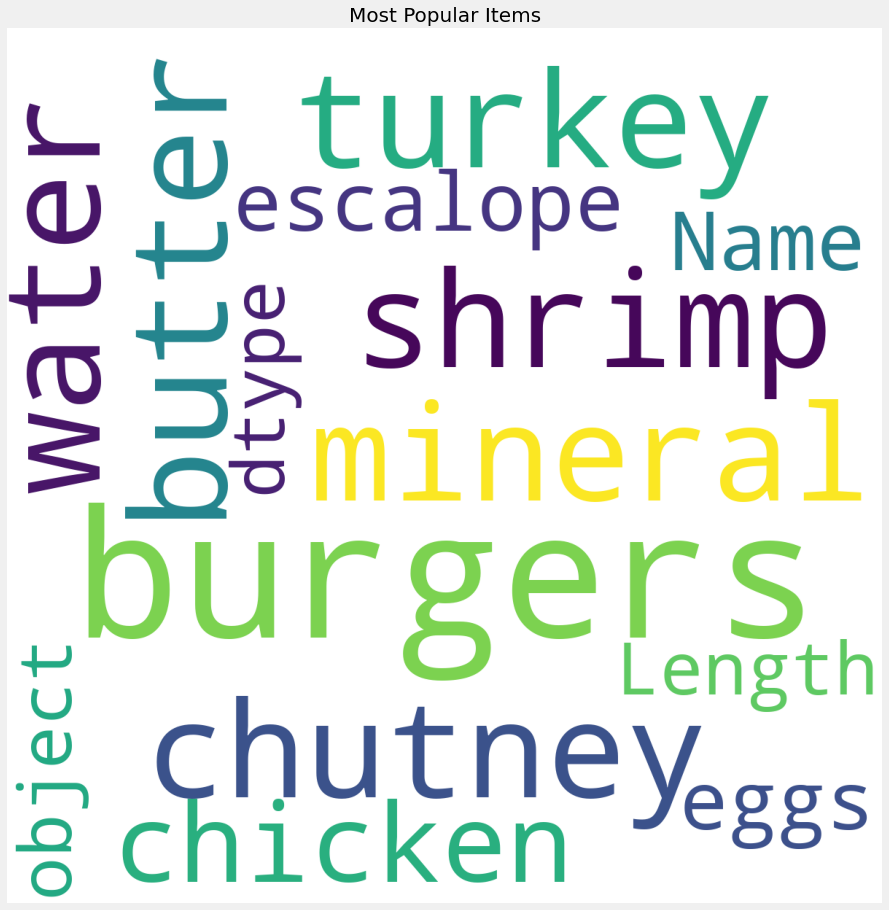

In [8]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

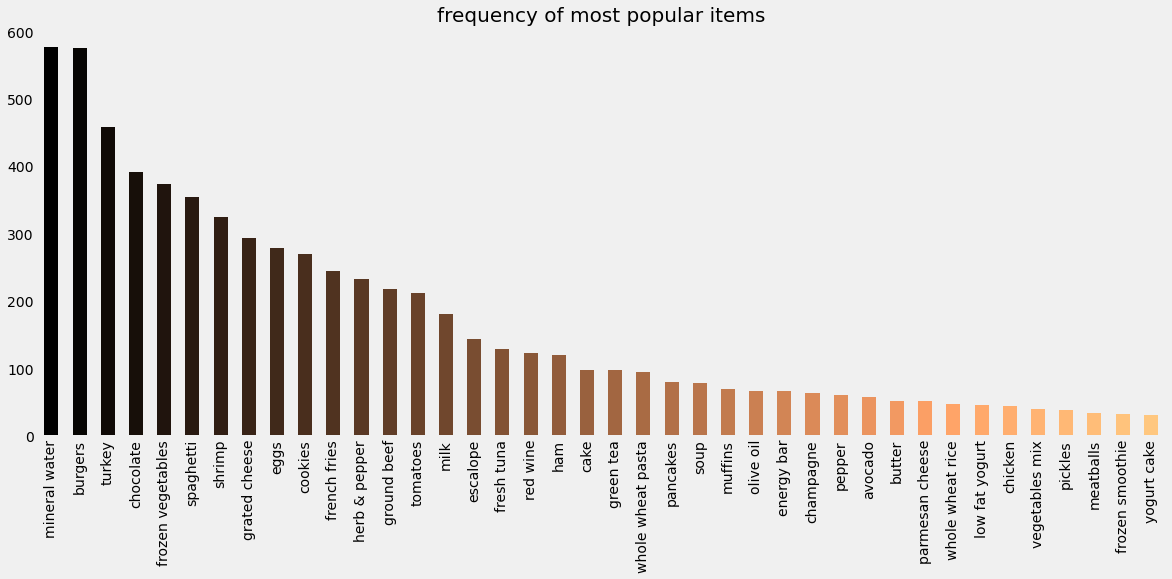

In [9]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [10]:
y = data[0].value_counts().head(50).to_frame()
y.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'olive oil',
       'energy bar', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'hot dogs', 'dessert wine', 'honey',
       'candy bars', 'cereals', 'yams', 'strawberries', 'oil', 'tomato sauce'],
      dtype='object')

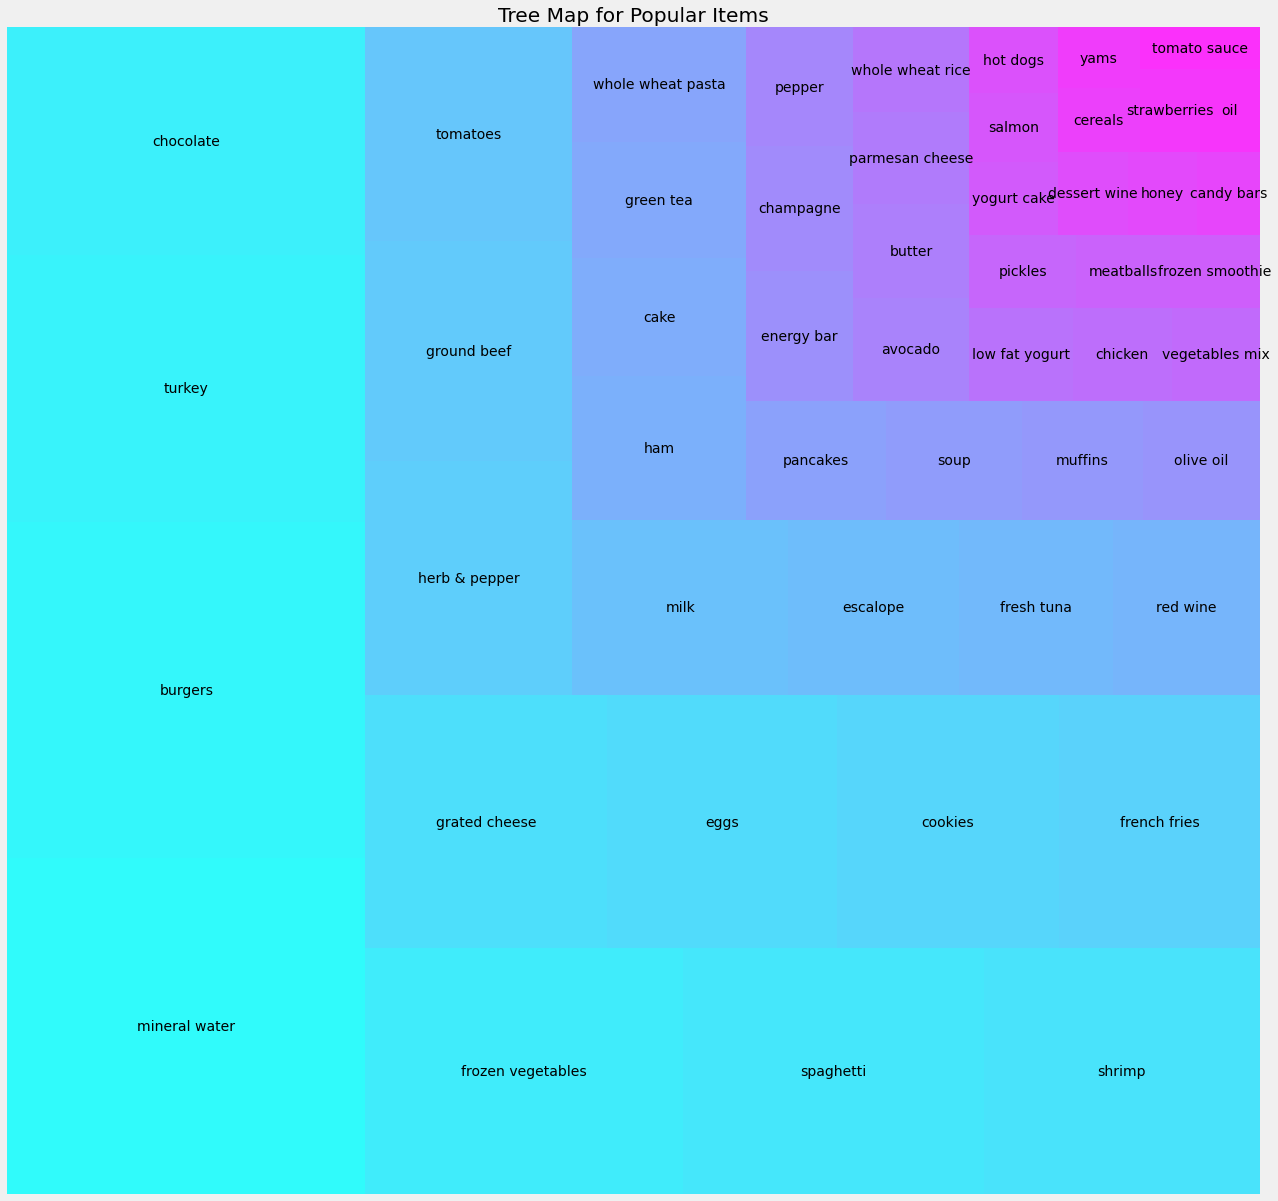

In [11]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

In [12]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)


import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

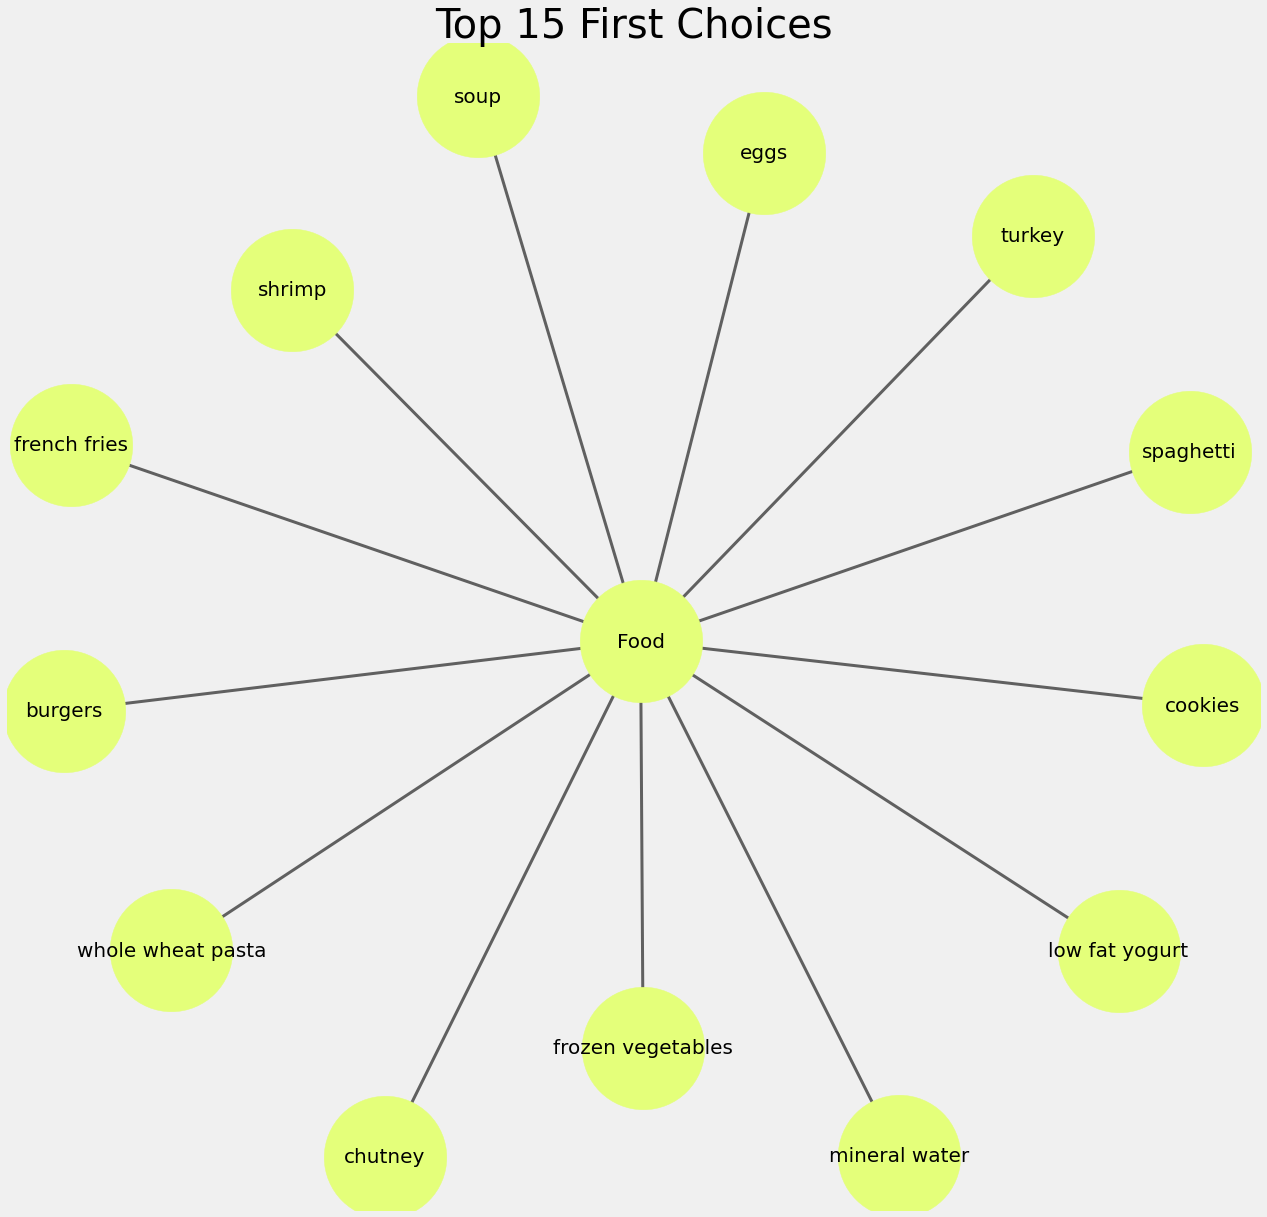

In [13]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [14]:
data['secondchoice'] = 'Second Choice'
secondchoice = data.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)

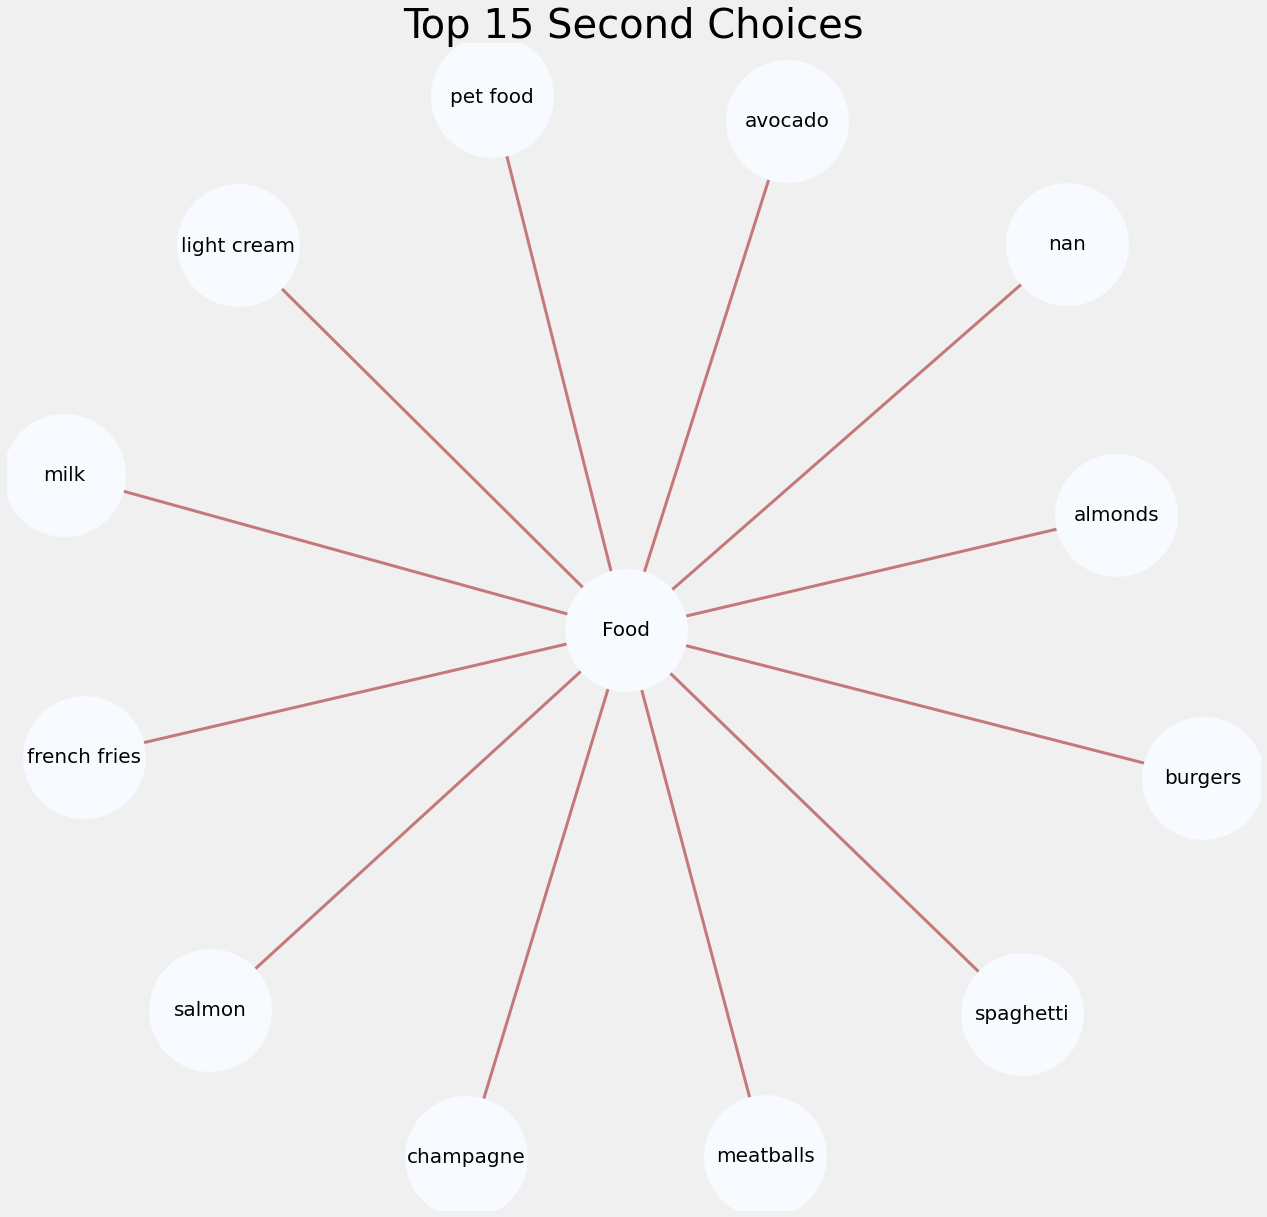

In [15]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

In [16]:
data['thirdchoice'] = 'Third Choice'
secondchoice = data.truncate(before = -1, after = 10)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 2, edge_attr = True)

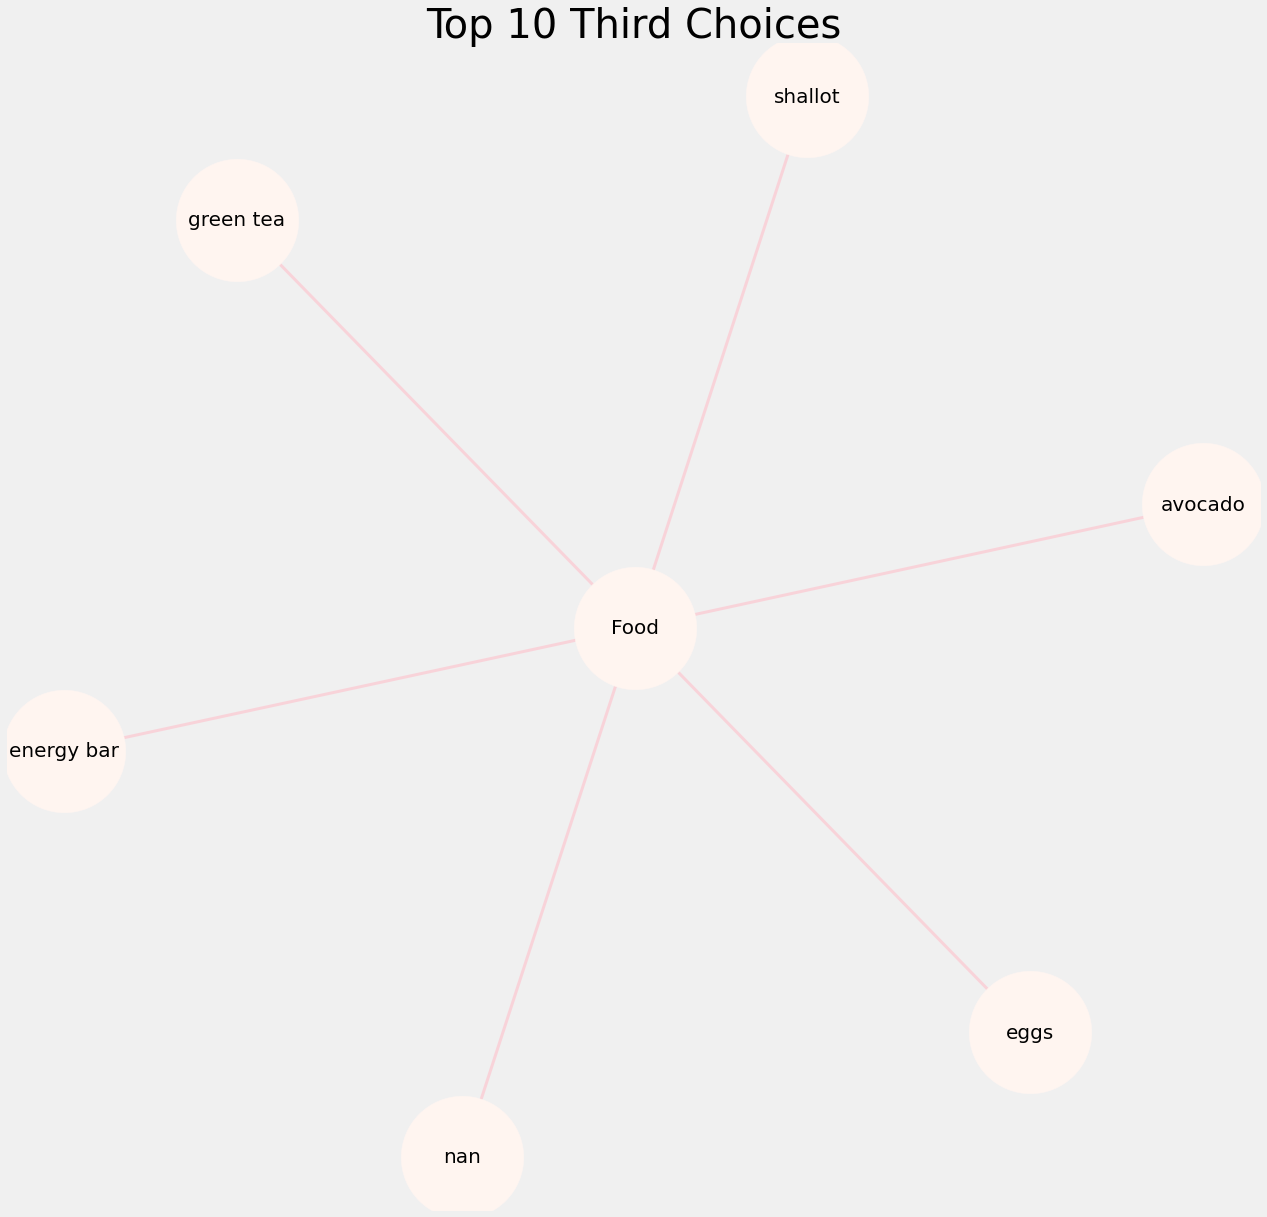

In [17]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'pink')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 Third Choices', fontsize = 40)
plt.show()


In [18]:
records = []
for i in range(1, 7501):
    records.append([str(data.values[i, j]) for j in range(0, 20)])

In [19]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [20]:
#Deriving the total number of relations 

print("There are {} Relation derived.".format(len(association_results)))

There are 48 Relation derived.


In [29]:
# establishing the relation 

for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'light cream', 'chicken'})
frozenset({'mushroom cream sauce', 'escalope'})
frozenset({'pasta', 'escalope'})
frozenset({'ground beef', 'herb & pepper'})
frozenset({'tomato sauce', 'ground beef'})
frozenset({'whole wheat pasta', 'olive oil'})
frozenset({'pasta', 'shrimp'})
frozenset({'nan', 'light cream', 'chicken'})
frozenset({'shrimp', 'frozen vegetables', 'chocolate'})
frozenset({'cooking oil', 'ground beef', 'spaghetti'})
frozenset({'mushroom cream sauce', 'nan', 'escalope'})
frozenset({'pasta', 'nan', 'escalope'})
frozenset({'ground beef', 'frozen vegetables', 'spaghetti'})
frozenset({'milk', 'frozen vegetables', 'olive oil'})
frozenset({'shrimp', 'mineral water', 'frozen vegetables'})
frozenset({'olive oil', 'frozen vegetables', 'spaghetti'})
frozenset({'shrimp', 'frozen vegetables', 'spaghetti'})
frozenset({'tomatoes', 'frozen vegetables', 'spaghetti'})
frozenset({'ground beef', 'spaghetti', 'grated cheese'})
frozenset({'ground beef', 'herb & pepper', 'mineral water'})


In [30]:
def inspect(association_results):
    lhs         = [tuple(association_results[2][0][0])[0] for association_results in association_results]
    rhs         = [tuple(association_results[2][0][1])[0] for association_results in association_results]
    supports    = [association_results[1] for association_results in association_results]
    confidences = [association_results[2][0][2] for association_results in association_results]
    lifts       = [association_results[2][0][3] for association_results in association_results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
association_resultsin_DataFrame = pd.DataFrame(inspect(association_results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [31]:
# Items by Association Rules

print("# Items by Association Rules\n")

for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    # second index of the inner list
    print("Support: " + str(item[1]))

    # third index of the list located at 0th
    # of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

# Items by Association Rules

Rule: light cream -> chicken
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: mushroom cream sauce -> escalope
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
Rule: pasta -> escalope
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
Rule: ground beef -> herb & pepper
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
Rule: tomato sauce -> ground beef
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
Rule: whole wheat pasta -> olive oil
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346
Rule: pasta -> shrimp
Support: 0.005066666666666666
Confidence: 0.3220338983050848
Lift: 4.514493901473151
Rule: nan -> light cream
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: shrimp -> frozen vegetables
Support: 0.005333333333333333
Confid

In [32]:
# All the items with left and right combination along with Support,Confidence and Lift value
association_resultsin_DataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843305
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790327
2,pasta,escalope,0.005867,0.372881,4.700185
3,herb & pepper,ground beef,0.016000,0.323450,3.291555
4,tomato sauce,ground beef,0.005333,0.377358,3.840147
5,whole wheat pasta,olive oil,0.008000,0.271493,4.130221
6,pasta,shrimp,0.005067,0.322034,4.514494
7,light cream,nan,0.004533,0.290598,4.843305
8,frozen vegetables,shrimp,0.005333,0.232558,3.260161
9,cooking oil,spaghetti,0.004800,0.571429,3.281558


In [34]:
# Sorted by Highest to lowest lift values

association_resultsin_DataFrame.nlargest(n=48,columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843305
7,light cream,nan,0.004533,0.290598,4.843305
11,pasta,nan,0.005867,0.372881,4.700185
2,pasta,escalope,0.005867,0.372881,4.700185
28,pasta,nan,0.005067,0.322034,4.514494
6,pasta,shrimp,0.005067,0.322034,4.514494
27,whole wheat pasta,nan,0.008000,0.271493,4.130221
5,whole wheat pasta,olive oil,0.008000,0.271493,4.130221
21,herb & pepper,ground beef,0.006400,0.393443,4.003826
41,herb & pepper,nan,0.006400,0.393443,4.003826


# Hence, Items can be arrange by the above order of sequence to Increase the sale